
# Gender Prediction using phython




## Import Important Package


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score


In [2]:

df = pd.read_csv('gender_hwf.csv')
df.head()


,Person,height(in feet),weight(in lbs),foot size(in inches)
0,Male,NaN,241.893563,10.0
1,Male,68.781904,162.310473,12.0
2,Male,74.110105,212.740856,10.0
3,Male,71.730978,220.042470,11.0
4,Male,69.881796,206.349801,10.0


In [3]:
df


,Person,height(in feet),weight(in lbs),foot size(in inches)
0,Male,NaN,241.893563,10.0
1,Male,68.781904,162.310473,12.0
2,Male,74.110105,212.740856,10.0
3,Male,71.730978,220.042470,11.0
4,Male,69.881796,206.349801,10.0
...,...,...,...,...
9995,Female,66.172652,136.777454,7.0
9996,Female,67.067155,170.867906,9.0
9997,Female,63.867992,128.475319,8.0
9998,Female,69.034243,163.852461,7.0


In [4]:
df.describe()

,height(in feet),weight(in lbs),foot size(in inches)
count,9930.000000,9916.000000,9305.000000
mean,66.379861,161.644172,9.160559
std,3.850525,32.095392,1.871407
min,54.263133,64.700127,6.000000
25%,63.522005,135.954077,7.000000
50%,66.335970,161.647724,10.000000
75%,69.194942,187.348518,11.000000
max,78.998742,269.989698,12.000000


In [5]:
# Describe the dataset
print(df.describe())

       height(in feet)  weight(in lbs)  foot size(in inches)
count      9930.000000     9916.000000           9305.000000
mean         66.379861      161.644172              9.160559
std           3.850525       32.095392              1.871407
min          54.263133       64.700127              6.000000
25%          63.522005      135.954077              7.000000
50%          66.335970      161.647724             10.000000
75%          69.194942      187.348518             11.000000
max          78.998742      269.989698             12.000000


In [6]:
print(df.loc[47])

# Print the shape of the dataset
print(df.shape)

Person                        Male
height(in feet)          72.172709
weight(in lbs)          209.070863
foot size(in inches)          11.0
Name: 47, dtype: object
(10000, 4)


In [7]:
df.shape

(10000, 4)


### Deal with Null values


In [8]:
df.isna().sum()  # is null(); is it null or not

Person                    0
height(in feet)          70
weight(in lbs)           84
foot size(in inches)    695
dtype: int64

In [9]:
df.tail()

,Person,height(in feet),weight(in lbs),foot size(in inches)
9995,Female,66.172652,136.777454,7.0
9996,Female,67.067155,170.867906,9.0
9997,Female,63.867992,128.475319,8.0
9998,Female,69.034243,163.852461,7.0
9999,Female,61.944246,113.649103,9.0



### Visualization of Existing Dataset


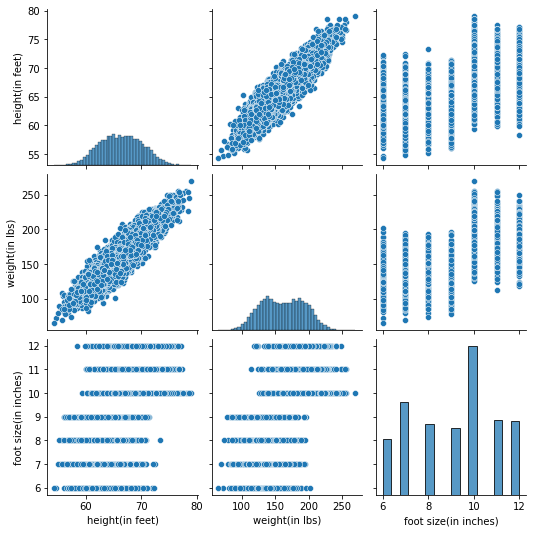

In [10]:
sns.pairplot(df)


array([[<AxesSubplot:title={'center':'height(in feet)'}>,
        <AxesSubplot:title={'center':'weight(in lbs)'}>],
       [<AxesSubplot:title={'center':'foot size(in inches)'}>,
        <AxesSubplot:>]], dtype=object)

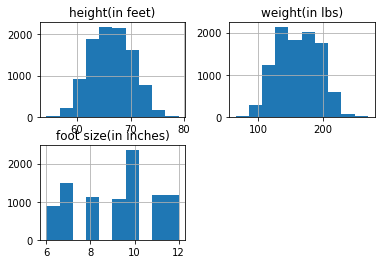

In [11]:
h = df[['Person','height(in feet)','weight(in lbs)','foot size(in inches)']]
h.hist()


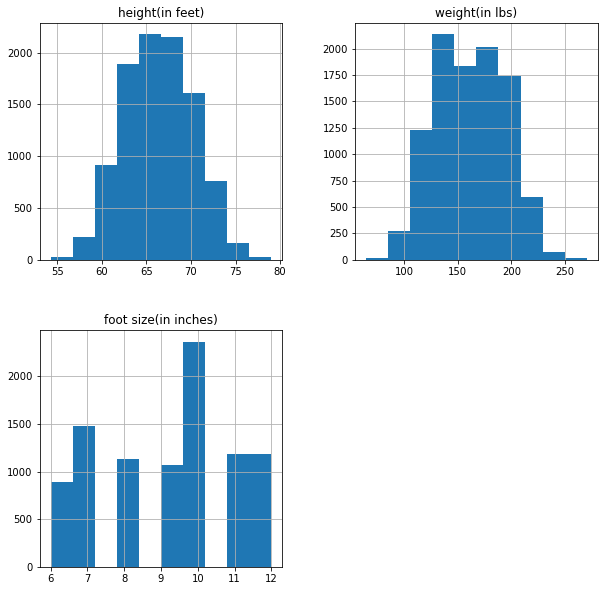

In [12]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

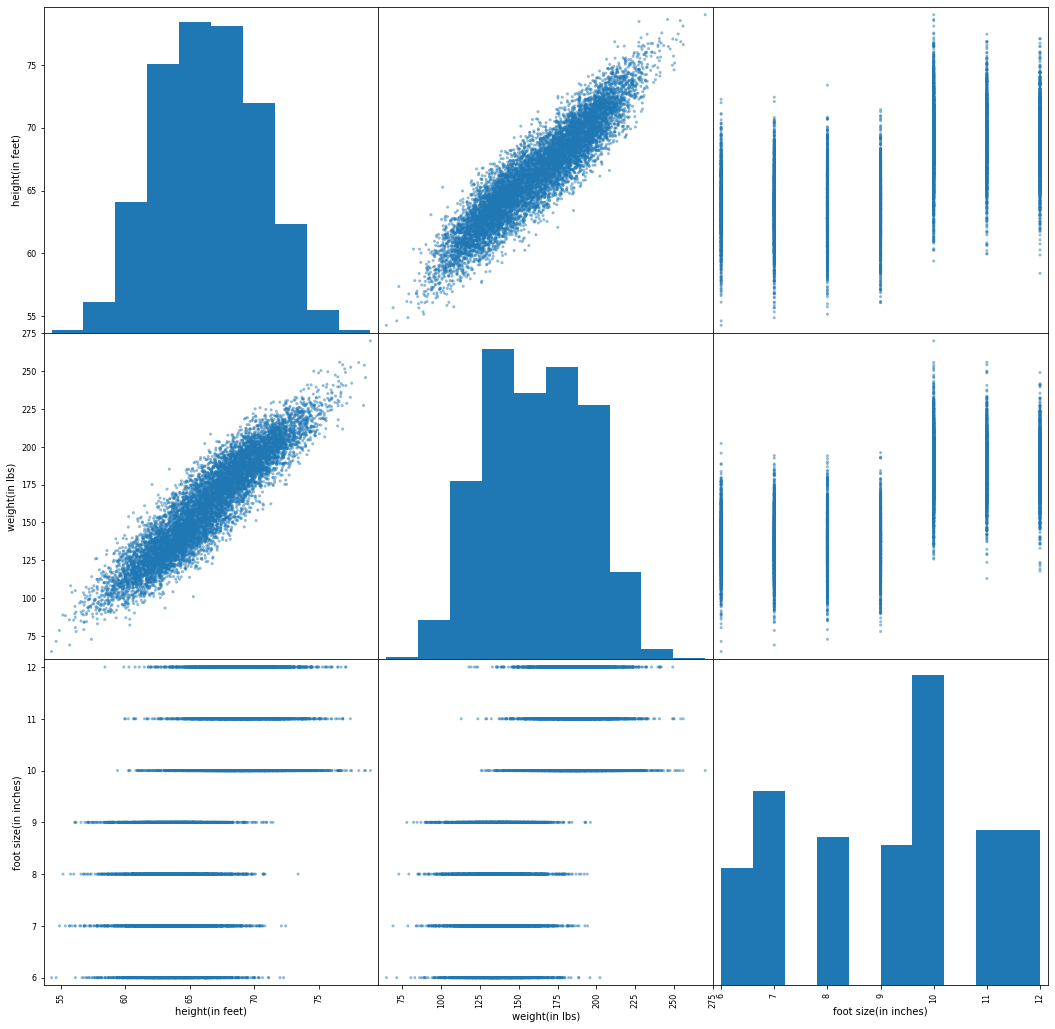

In [13]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()


### Train - Test - Split


### Logistic Regression


In [14]:
X = df.iloc[:, 1:].values
X

array([[         nan, 241.8935632 ,  10.        ],
       [ 68.78190405, 162.3104725 ,  12.        ],
       [ 74.11010539, 212.7408556 ,  10.        ],
       ...,
       [ 63.86799221, 128.4753188 ,   8.        ],
       [ 69.03424313, 163.8524613 ,   7.        ],
       [ 61.94424588, 113.6491027 ,   9.        ]])

In [15]:
y = df.iloc[:, 0].values
y

array(['Male', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7500, 3) (7500,)
Test set: (2500, 3) (2500,)


In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)